In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

In [4]:
filename="../Lecture.6/SUSY.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

In [5]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

## Create Data Like Sample

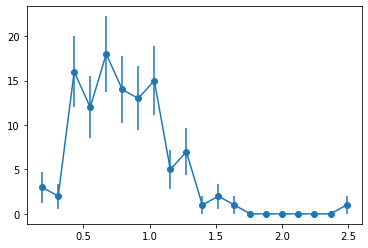

In [32]:
import math
n_bkg_expected = 100
n_sig_expected = 10

data = df_sig[:n_sig_expected]["M_TR_2"].tolist()+df_bkg[:n_bkg_expected]["M_TR_2"].tolist()

c , bin_edges= np.histogram(data,bins=20)
bin_width = bin_edges[1]-bin_edges[0]
bin_centers = 0.5*(bin_edges[1:]+bin_edges[:-1])
error    = np.sqrt(c)

plt.errorbar(bin_centers, c, yerr=error, marker="o")
plt.show()

## Optain Probability Distributions from Simulation

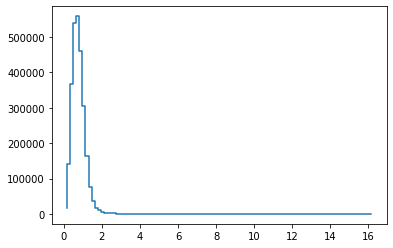

In [33]:
c_bkg_sim, sim_bin = np.histogram(df_bkg["M_TR_2"],bins=100) 
plt.step(sim_bin[1:],c_bkg_sim)

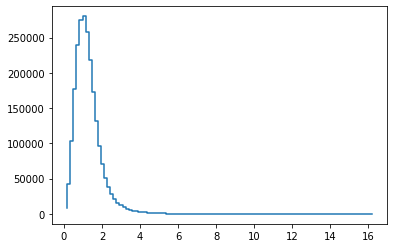

In [34]:
c_sig_sim, sim_bin = np.histogram(df_sig["M_TR_2"],bins=sim_bin)
plt.step(sim_bin[1:],c_sig_sim)

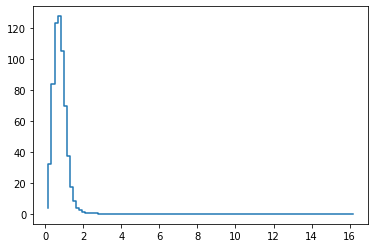

In [35]:
bin_size_sim = sim_bin[1]-sim_bin[0]
integral = sum(c_bkg_sim) * bin_size_sim
c_bkg_sim_normalized = (n_bkg_expected / integral ) * c_bkg_sim
plt.step(sim_bin[1:],c_bkg_sim_normalized)

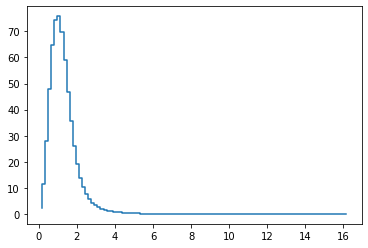

In [16]:
integral = sum(c_sig_sim) * bin_size_sim
c_sig_sim_normalized = (n_sig_expected / integral ) * c_sig_sim
plt.step(sim_bin[1:],c_sig_sim_normalized)

## Combine to Compare Data and Simulation

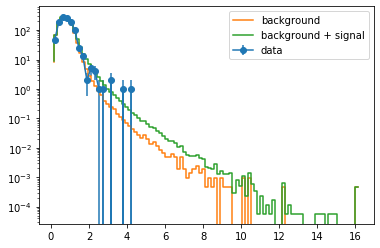

In [17]:
plt.errorbar(bin_centers, c, yerr=error, marker="o",label="data")
plt.yscale("log")
plt.step(sim_bin[1:],c_bkg_sim_normalized*bin_width,label="background")
plt.step(sim_bin[1:],(c_bkg_sim_normalized+c_sig_sim_normalized)*bin_width,label="background + signal")
plt.legend()
plt.show()

## Calculate TPR / FPR

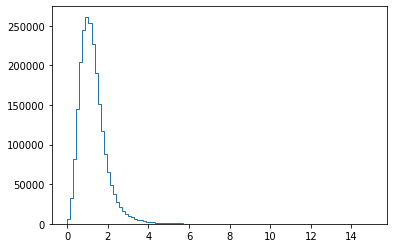

In [36]:
_=plt.hist(df_sig["M_TR_2"],bins=100,histtype="step")

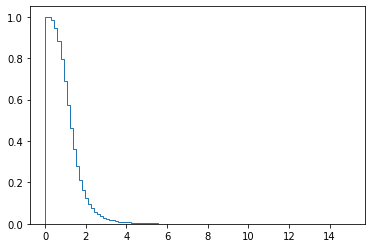

In [38]:
TPR,bins_sig,_=plt.hist(df_sig["M_TR_2"],bins=100,histtype="step",cumulative=-1,density=True)

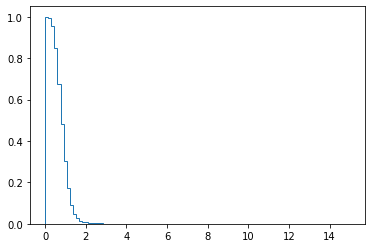

In [39]:
FPR,bins_sig,_=plt.hist(df_bkg["M_TR_2"],bins=bins_sig,histtype="step",cumulative=-1,density=True)

## Compute Significance

Assume 3 different scenarios corresponding to different numbers of signal and background events expected in data:

1. Expect $N_S=10$, $N_B=100$.
1. Expect $N_S=100$, $N_B=1000$.
1. Expect $N_S=1000$, $N_B=10000$.
1. Expect $N_S=10000$, $N_B=100000$.

Plot the significance ($\sigma_{S'}$) for each observable as function of $x_c$ for each scenario, where 

$\sigma_{S'}= \frac{N'_S}{\sqrt{N'_S+N'_B}}$

and $N'_{S,B} = \epsilon_{S,B}(x_c) * N_{S,B}$.

In [45]:
n_bkg_expected = 10000
n_sig_expected = 1000

n_sig_expected_prime = n_sig_expected * TPR
n_bkg_expected_prime = n_bkg_expected * FPR

sig = n_sig_expected_prime/ np.sqrt(n_sig_expected_prime + n_bkg_expected_prime )

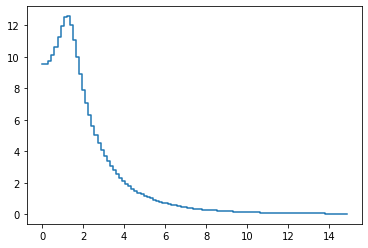

In [46]:
plt.step(bins_sig[:-1],sig)